# FantaBayesianNet

In [1]:
import sys
!{sys.executable} -m pip install pgmpy
!{sys.executable} -m pip install --upgrade pip

     |████████████████████████████████| 337kB 29.4MB/s 
     |████████████████████████████████| 1.5MB 17.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


## 1. Define the model
The first step consists in building the structure of our model, that is to define the relations between the involved variables.
In the following lines we define the network model using pgmpy library and I display the resulting graph using networkx.

In [2]:
from pgmpy.models import BayesianModel

# Grade = ([<=5.5], [6-7], [7.5-9], [>=9.5])


model = BayesianModel([('available', 'starter'),
                       ('starter', 'time_range'),
                       ('time_range', 'red_card'),
                       ('time_range', 'yellow_card'),
                       ('time_range', 'goal'),
                       ('time_range', 'assist'),
                       ('red_card', 'grade_range'),
                       ('yellow_card', 'grade_range'),
                       ('goal', 'grade_range'),
                       ('assist', 'grade_range'),
                       #('difficulty_match', 'deployability'),
                       ('grade_range', 'deployability'),
                       ('time_range', 'deployability')
                       ])

#Network nodes and out-edges
nodes = list(model.nodes())
edges = list(model.edges())
print("Nodes:", nodes)
print("\nOutEdges:", edges)

Nodes: ['available', 'starter', 'time_range', 'red_card', 'yellow_card', 'goal', 'assist', 'grade_range', 'deployability']

OutEdges: [('available', 'starter'), ('starter', 'time_range'), ('time_range', 'red_card'), ('time_range', 'yellow_card'), ('time_range', 'goal'), ('time_range', 'assist'), ('time_range', 'deployability'), ('red_card', 'grade_range'), ('yellow_card', 'grade_range'), ('goal', 'grade_range'), ('assist', 'grade_range'), ('grade_range', 'deployability')]


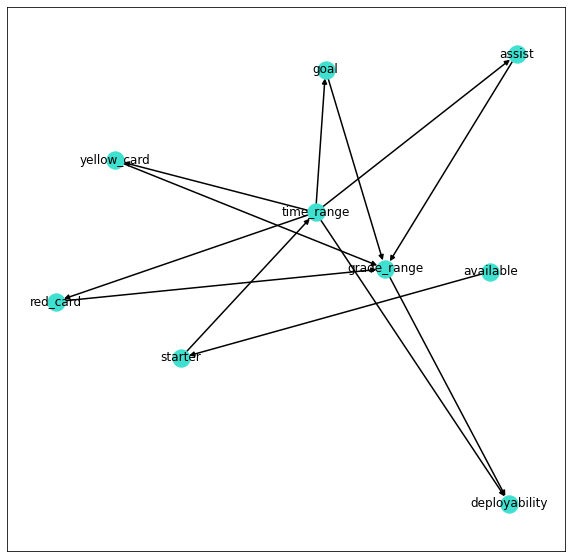

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
np.random.seed(8)

DAG = nx.DiGraph()
DAG.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
pos = nx.spring_layout(DAG) #Position nodes computed by using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx_nodes(DAG, pos=pos, node_color='turquoise')
nx.draw_networkx_labels(DAG, pos=pos)
nx.draw_networkx_edges(DAG, pos=pos, edge_color='black', width = 1.5, arrows=True)
plt.show()

# 

In [4]:
from google.colab import files
upload = files.upload()

Saving stats_barrow.csv to stats_barrow.csv
Saving stats_belotti.csv to stats_belotti.csv
Saving stats_berardi.csv to stats_berardi.csv
Saving stats_caicedo.csv to stats_caicedo.csv
Saving stats_caputo.csv to stats_caputo.csv
Saving stats_correa.csv to stats_correa.csv
Saving stats_cristiano_ronaldo.csv to stats_cristiano_ronaldo.csv
Saving stats_destro.csv to stats_destro.csv
Saving stats_dzeko.csv to stats_dzeko.csv
Saving stats_ibrahimovic.csv to stats_ibrahimovic.csv
Saving stats_ilicic.csv to stats_ilicic.csv
Saving stats_immobile.csv to stats_immobile.csv
Saving stats_insigne.csv to stats_insigne.csv
Saving stats_joão_pedro.csv to stats_joão_pedro.csv
Saving stats_lozano.csv to stats_lozano.csv
Saving stats_lukaku.csv to stats_lukaku.csv
Saving stats_martínez.csv to stats_martínez.csv
Saving stats_mayoral.csv to stats_mayoral.csv
Saving stats_messias.csv to stats_messias.csv
Saving stats_morata.csv to stats_morata.csv
Saving stats_muriel.csv to stats_muriel.csv
Saving stats_nzola

# 2. Fitting the data
Different dataframes have been merged to get a single dataframe of players

In [13]:
import os
import pandas as pd
from pgmpy.estimators import BayesianEstimator

list_file = os.listdir()


list_file.remove('.config')
list_file.remove('sample_data')
#print(list_file)

players = []

for file in list_file:
  players.append(pd.read_csv(file))

df = pd.concat(players)
df
model.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.dtypes

matchday             int64
grade_range         object
goal                  bool
assist                bool
yellow_card           bool
red_card              bool
available             bool
starter               bool
time_range          object
difficulty_match     int64
deployability         bool
dtype: object

Correlation matrix has been used to understand whether flow of influence among variables were meaningful.

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Finding correlations among variables

# Transforming ordinal variables

ordinal_features =['time_range', 'grade_range']
ordinal_transformer = OrdinalEncoder(dtype = np.int32)
preprocessor = ColumnTransformer(
    transformers = [
                    ('ord', ordinal_transformer, ordinal_features)
                   ],
                    remainder = 'passthrough'  #  with 'drop' the non-specified columns are dropped
                                               # with 'passthrough' the non-specified columns in transformers will be automatically passed through
    )

preprocessor.fit(df)

df_p = preprocessor.fit_transform(df)
columns= ['time_range', 'grade_range', 'matchday', 'goal', 'assist', 'yellow_card', 'red_card',
       'available', 'starter', 'difficulty_match',
       'deployability']

# Checking conversions

# Conversion on dataframe for all players
df_p = pd.DataFrame(df_p, columns=columns).convert_dtypes()
print(df_p.head())
print(df_p.dtypes)

# Conversion for a single player (Simy)
df_simy = pd.read_csv('stats_simy.csv')
preprocessor.fit(df_simy)
df_simy_p = preprocessor.fit_transform(df_simy)
columns= ['time_range', 'grade_range', 'matchday', 'goal', 'assist', 'yellow_card', 'red_card',
       'available', 'starter', 'difficulty_match',
       'deployability']
df_simy_p = pd.DataFrame(df_simy_p, columns=columns).convert_dtypes()
df_simy_p.head()

   time_range  grade_range  matchday  ...  starter  difficulty_match  deployability
0           2            0         1  ...     True                 3           True
1           2            0         2  ...     True                 5          False
2           2            0         3  ...     True                 4           True
3           2            0         4  ...     True                 5           True
4           2            3         5  ...     True                 3           True

[5 rows x 11 columns]
time_range            Int64
grade_range           Int64
matchday              Int64
goal                boolean
assist              boolean
yellow_card         boolean
red_card            boolean
available           boolean
starter             boolean
difficulty_match      Int64
deployability       boolean
dtype: object


,time_range,grade_range,matchday,goal,assist,yellow_card,red_card,available,starter,difficulty_match,deployability
0,2,2,1,False,False,False,False,True,True,3,False
1,2,2,2,False,False,False,False,True,True,5,False
2,2,1,3,True,False,True,False,True,True,4,True
3,2,3,4,True,False,False,False,True,True,5,True
4,2,0,5,False,False,False,False,True,True,3,True


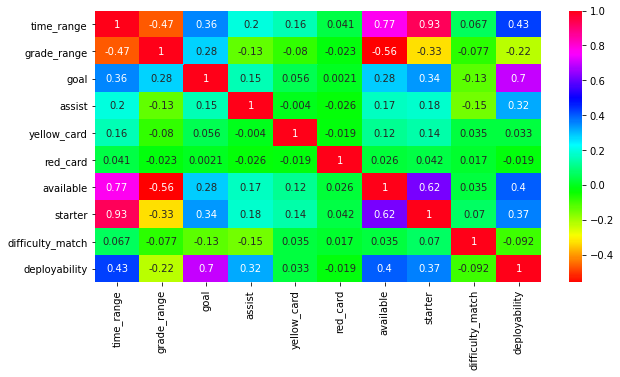

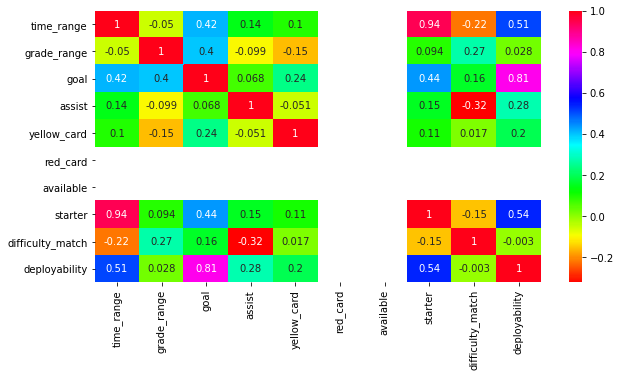

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df_p.drop('matchday', axis=1).corr(), annot=True, cmap='hsv')
plt.show()


plt.figure(figsize=(10,5))
sns.heatmap(df_simy_p.drop('matchday', axis=1).corr(), annot=True, cmap='hsv')
plt.show()

# Deployability -> True :- grade>=6 || (difficulty_math<=2 && starter=True)

# 3. Markov blanket

-------------------------------------------------------------------------------- 

available 
Markov blanket -> ['starter']


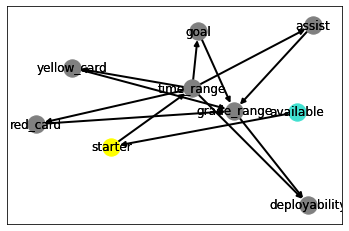

-------------------------------------------------------------------------------- 

starter 
Markov blanket -> ['available', 'time_range']


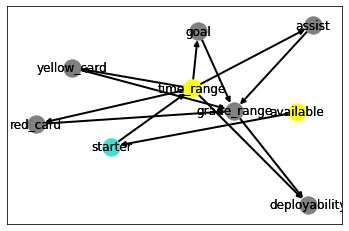

-------------------------------------------------------------------------------- 

time_range 
Markov blanket -> ['red_card', 'yellow_card', 'deployability', 'grade_range', 'starter', 'goal', 'assist']


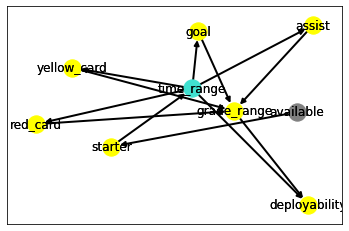

-------------------------------------------------------------------------------- 

red_card 
Markov blanket -> ['yellow_card', 'grade_range', 'goal', 'time_range', 'assist']


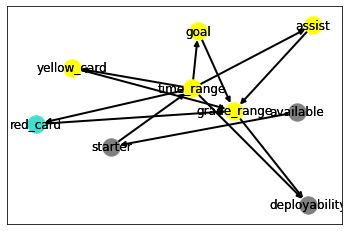

-------------------------------------------------------------------------------- 

yellow_card 
Markov blanket -> ['red_card', 'grade_range', 'goal', 'time_range', 'assist']


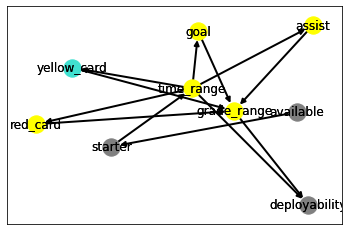

-------------------------------------------------------------------------------- 

goal 
Markov blanket -> ['red_card', 'yellow_card', 'grade_range', 'time_range', 'assist']


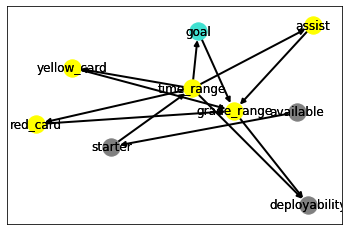

-------------------------------------------------------------------------------- 

assist 
Markov blanket -> ['red_card', 'yellow_card', 'grade_range', 'goal', 'time_range']


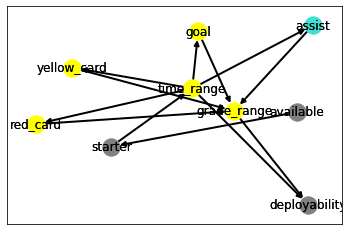

-------------------------------------------------------------------------------- 

grade_range 
Markov blanket -> ['red_card', 'deployability', 'yellow_card', 'goal', 'time_range', 'assist']


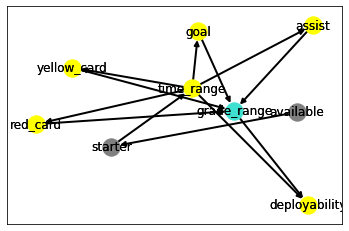

In [9]:
leaves = model.get_leaves()
markov_blanket = {}

for node in nodes:
    if not node in leaves:
        markov_blanket[node] = model.get_markov_blanket(node)
        print("-"*80,"\n")
        print(node, "\nMarkov blanket ->", markov_blanket[node])
        
        nx.draw_networkx_nodes(DAG, pos, nodelist=[node], node_color='turquoise')
        nx.draw_networkx_nodes(DAG, pos, nodelist=markov_blanket[node], node_color='yellow')
        nx.draw_networkx_nodes(DAG, pos, 
               nodelist = [n for n in nodes if n not in markov_blanket[node] and n != node], 
               node_color='grey')
        nx.draw_networkx_labels(DAG, pos)
        nx.draw_networkx_labels(DAG, pos)
        nx.draw_networkx_edges(DAG, pos, edge_color='black', width = 2.0, arrows=True)
        plt.show()

# 4. Local semantics

In [ ]:
# Each node is independent from all non descendants given its parents
model.get_independencies()

# 5. Exact Inference with Variable Elimination

In [14]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
print(inference.query(['grade_range']
                      ,{'deployability': True}
                      ))

# Probability that the player has made a goal given a grade range 6-7 and how this probability
# can be influenced by the fact that he has taken a yellow card (intercausal reasoning)

print(" P(goal|grade_range = 7.5-9)")
print(inference.query(['goal']
                      ,{'grade_range': '7.5-9'}
                      ))
print(" P(goal|grade_range = 7.5-9,yellow_card = True)")
print(inference.query(['goal']
                      ,{'grade_range': '7.5-9', 'yellow_card':True}
                      ))

# Evidential reasoning P(deployability|yellow_card) and P(deployability|yellow_card,goal)

print(" P(deployability|yellow_card)")
print(inference.query(['deployability']
                      ,{'yellow_card': True}
                      ))
print(" P(deployability|yellow_card,goal)")
print(inference.query(['deployability']
                      ,{'yellow_card':True, 'goal':True}
                      ))




Eliminating: assist:   0%|          | 0/7 [00:00<?, ?it/s]     

+--------------------+--------------------+
| grade_range        |   phi(grade_range) |
+====================+====================+
| grade_range(6-7)   |             0.2649 |
+--------------------+--------------------+
| grade_range(7.5-9) |             0.1248 |
+--------------------+--------------------+
| grade_range(<=5.5) |             0.0187 |
+--------------------+--------------------+
| grade_range(>=9.5) |             0.4887 |
+--------------------+--------------------+
| grade_range(sv)    |             0.1029 |
+--------------------+--------------------+
 P(goal|grade_range = 7.5-9)
+-------------+-------------+
| goal        |   phi(goal) |
+=============+=============+
| goal(False) |      0.4725 |
+-------------+-------------+
| goal(True)  |      0.5275 |
+-------------+-------------+
 P(goal|grade_range = 7.5-9,yellow_card = True)
+-------------+-------------+
| goal        |   phi(goal) |
+=============+=============+
| goal(False) |      0.1629 |
+-------------+------

Eliminating: time_range: 100%|██████████| 6/6 [00:00<00:00, 224.27it/s]

+----------------------+----------------------+
| deployability        |   phi(deployability) |
+======================+======================+
| deployability(False) |               0.4607 |
+----------------------+----------------------+
| deployability(True)  |               0.5393 |
+----------------------+----------------------+
 P(deployability|yellow_card,goal)
+----------------------+----------------------+
| deployability        |   phi(deployability) |
+======================+======================+
| deployability(False) |               0.0267 |
+----------------------+----------------------+
| deployability(True)  |               0.9733 |
+----------------------+----------------------+
